# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name**.

In [9]:
import pandas as pd

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the normal name for a dataframe

In [12]:
df = pd.read_csv("/home/abstech151/assignments/homework5/animals.csv")

#df.head(10)

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [55]:
animals = df

In [14]:
animals.shape

NameError: name 'animals' is not defined

In [70]:
animals

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35
6,cat,Xypher,10


In [56]:
animals.tail()


,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35
6,cat,Xypher,10


In [74]:
animals.sort_values(by='animal')

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
4,cat,Charlie,32
6,cat,Xypher,10
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


In [71]:
len(animals)

7

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but maybe the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [58]:
animals.head(3)


,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [80]:
animals.sort_values(by='length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [62]:
round(animals['length'].mean(), 2)

38.86

In [63]:
round(animals['length'].std(), 2)

17.1

## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [94]:
animals.sort_values(by=['animal'])

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
4,cat,Charlie,32
6,cat,Xypher,10
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


In [95]:
df.animal.count()

7

In [140]:
animals['animal'].value_counts()

cat    4
dog    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [146]:
is_dog = animals[animals['animal']=='dog']
print(is_dog['name'])


2    Egglesburg
3         Devon
5      Fontaine
Name: name, dtype: object


## 8) Only display the animals that are longer than 40cm

In [155]:
tall_pet=animals[animals['length'] > 40]
print(tall_pet['name'])

1           Bob
2    Egglesburg
3         Devon
Name: name, dtype: object


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [162]:
animals['inches']=animals['length']*.4
print(animals['inches'])

0    14.0
1    18.0
2    26.0
3    20.0
4    12.8
5    14.0
6     4.0
Name: inches, dtype: float64


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [231]:
cats = animals[animals['animal'] == 'cat'] 
print(cats.head())
print(cats.shape)
#is_dog = animals[animals['animal']=='dog']




  animal     name  length  inches
0    cat     Anne      35    14.0
1    cat      Bob      45    18.0
4    cat  Charlie      32    12.8
6    cat   Xypher      10     4.0
(4, 4)


In [202]:
dogs = animals[animals['animal'] != 'cat'] 
print(dogs.head())

  animal        name  length  inches
2    dog  Egglesburg      65    26.0
3    dog       Devon      50    20.0
5    dog    Fontaine      35    14.0


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [237]:
tall_cats = cats[(cats['inches'] > 12) & (cats['animal']!='dog')]
print(tall_cats.head())

  animal     name  length  inches
0    cat     Anne      35    14.0
1    cat      Bob      45    18.0
4    cat  Charlie      32    12.8


In [228]:
tall_cat=animals[(animals['inches'] > 12) & (animals['animal']!='dog')]
print(tall_cat.head())

  animal     name  length  inches
0    cat     Anne      35    14.0
1    cat      Bob      45    18.0
4    cat  Charlie      32    12.8


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [241]:
meancatlength=cats['inches'].mean()
print(meancatlength)

12.2


In [15]:
meandoglength=dogs['inches'].mean()
print(meandoglength)

NameError: name 'dogs' is not defined

## 13) If you didn't already, use `groupby` to do #12 all at once

In [4]:
gk = animals.groupby('animal').agg('mean')
print(gk)

NameError: name 'animals' is not defined

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

array([[<AxesSubplot:title={'center':'inches'}>]], dtype=object)

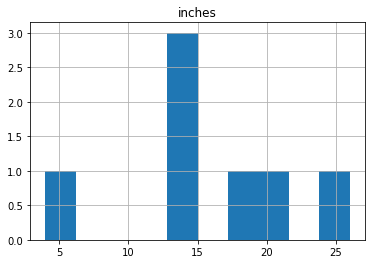

In [268]:
animals.hist(column=['inches'])

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** Make sure you specify the `kind` of graph or else it will be a weird line thing
>
> **TIP:** If you want, you can set a custom size for your plot by sending it something like `figsize=(15,2)`

In [284]:
animals['animal'].value_counts()

cat    4
dog    3
Name: animal, dtype: int64

<AxesSubplot:ylabel='name'>

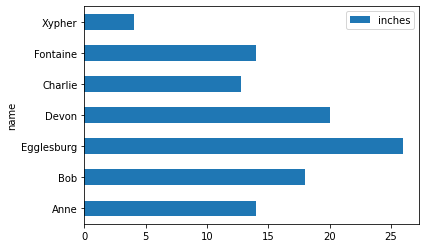

In [278]:
animals.sort_values(by=plot.barh(x='name', y = 'inches')
                    animals.sort_values(by=plot.barh(x='name', y = 'inches')

In [285]:
animals['animal'].value_counts()

cat    4
dog    3
Name: animal, dtype: int64

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

<AxesSubplot:ylabel='name'>

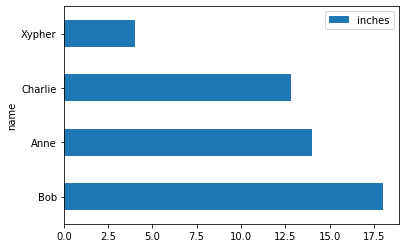

In [281]:
cats.sort_values(by='inches', ascending=False).plot.barh(x='name', y = 'inches')

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

> **TIP:** Counting the number of dogs and number of cats does NOT use `.groupby`! That's only for calculations.
>
> **TIP:** You can set a title with `title="Number of animals"`

In [282]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [286]:
#typecount=animals['animal'].value_counts()

cat    4
dog    3
Name: animal, dtype: int64

<AxesSubplot:>

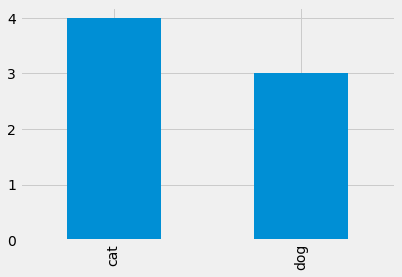

In [287]:
animals.animal.value_counts().plot(kind='bar')
#df.plot(kind='bar',x='animal',y='length')